<b style="background-color:black; color:yellow;">This project involves analyzing employees' salaries based on their designations, focusing on the highest and lowest salary distributions. It employs various statistical functions and methods, such as mean, median, and more. Additionally, the project includes visualization of employees' salary distribution by designation using charts.</b>


In [70]:
import mysql.connector

<b style="background-color:black; color:yellow;">First, we check if the database exists; if not, we create it. In this case, we are using an existing database called "dataanalysis" and creating a table within it.</b>

In [8]:
try:
    cur=mysql.connector.connect(
    host='localhost',
    user='root',
    password='viralshah21',
    database='dataanalysis'
    )
    cursor=cur.cursor()
    sql='''create table EmployeesProfession(FIRSTNAME VARCHAR(40),LASTNAME VARCHAR(40),SEX VARCHAR(40),DOJ DATE,
        CURRENTDATE DATE,DESIGNATION VARCHAR(40),AGE INT,SALARY INT,UNIT VARCHAR(40),LEAVESUSED INT,
        LEAVEDREMAINING INT,RATINGS INT,PASTEXP INT)
        '''
    cursor.execute(sql)
    print('successfully created a table')
    
    cursor.close()
    cur.close()

except Error as e:
    print(e)

successfully created a table


<b style="background-color:black; color:yellow;">After creating the table, we import two Python libraries: pandas and MySQL. Using pandas, we import a CSV file where all the data is stored. We then transfer the data from the CSV file into the MySQL database.</b>

In [9]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

# Read CSV file
df = pd.read_csv('Salary Prediction of Data Professions.csv')

# Convert date columns to the correct format
date_columns = ['DOJ', 'CURRENTDATE']  # Replace with your actual date column names
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%m-%d-%Y', errors='coerce').dt.strftime('%Y-%m-%d')

# Replace NaNs with None (which will be interpreted as NULL in MySQL)
df = df.where(pd.notnull(df), None)

try:
    # Connect to the MySQL database
    cur = mysql.connector.connect(
        host='localhost',
        user='root',
        password='viralshah21',
        database='dataanalysis'
    )

    cursor = cur.cursor()

    # Insert data into the table
    for i, row in df.iterrows():
        sql = '''INSERT INTO EmployeesProfession(FIRSTNAME, LASTNAME, SEX, DOJ, CURRENTDATE, DESIGNATION, AGE, SALARY,
                 UNIT, LEAVESUSED, LEAVEDREMAINING, RATINGS, PASTEXP)
                 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
        cursor.execute(sql, tuple(row))

    cur.commit()
    cursor.close()
    cur.close()
    print("All data has been successfully inserted into the EmployeeProfession table.")

except Error as e:
    print(e)


All data has been successfully inserted into the EmployeeProfession table.


<b style="background-color:black; color:yellow;">After successfully inserting all the data, we execute a query using the MySQL Python library to get the highest salary for each designation along with the employees' names. The resulting data is then stored in a different CSV file called "Department_Highest_Salary.csv."</b><br>
<b style="background-color:black; color:yellow;"> We use the `pd.read_sql_query` function to execute the query and load the results directly into a DataFrame.</b>

In [73]:
import mysql.connector

try:
    cur=mysql.connector.connect(
    host='localhost',
    user='root',
    password='viralshah21',
    database='dataanalysis'
    )
    
    cursor=cur.cursor()
    sql='''select firstname,lastname,sex,doj,designation,age,salary from employeesprofession where(designation,salary) 
            in(select designation,max(salary) from employeesprofession group by designation)
        '''
    cursor.execute(sql)
    for data in cursor:
        print(data)
        
    #Directly preview the data from the SQL query without creating a separate DataFrame. 
    df = pd.read_sql_query(sql, cur)
    print(df)
    
    # Save the DataFrame to a CSV file
    df.to_csv('Department Highest Salary.csv', index=False)
    cursor.close()
    cur.close()
except Error as e:
    print(e)

('DEREK', 'ABOULISSAN', 'M', datetime.date(2013, 2, 13), 'Director', 42, 388112)
('MABEL', 'AMBRIZ', 'F', datetime.date(2014, 1, 21), 'Senior Manager', 38, 199577)
('DAISY', 'AMER', 'F', datetime.date(2012, 5, 5), 'Associate', 31, 99603)
('MARGERY', 'ANZALDUA', 'F', datetime.date(2011, 4, 8), 'Manager', 35, 148890)
('DALLAS', 'ADLEY', 'M', datetime.date(2013, 9, 10), 'Analyst', 21, 49980)
('LEWIS', 'ABRAMOWITZ', 'M', datetime.date(2013, 12, 29), 'Senior Analyst', 25, 69966)
  firstname    lastname sex         doj     designation  age  salary
0     DEREK  ABOULISSAN   M  2013-02-13        Director   42  388112
1     MABEL      AMBRIZ   F  2014-01-21  Senior Manager   38  199577
2     DAISY        AMER   F  2012-05-05       Associate   31   99603
3   MARGERY    ANZALDUA   F  2011-04-08         Manager   35  148890
4    DALLAS       ADLEY   M  2013-09-10         Analyst   21   49980
5     LEWIS  ABRAMOWITZ   M  2013-12-29  Senior Analyst   25   69966


C:\Users\viral\AppData\Local\Temp\ipykernel_295848\4285313654.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, cur)


<b style="background-color:black; color:yellow;">We can import the pandas library to read data from the "Department_Highest_Salary.csv" file. </b>

In [75]:
import pandas as pd
df=pd.read_csv('Department Highest Salary.csv')
df

,firstname,lastname,sex,doj,designation,age,salary
0,DEREK,ABOULISSAN,M,2013-02-13,Director,42,388112
1,MABEL,AMBRIZ,F,2014-01-21,Senior Manager,38,199577
2,DAISY,AMER,F,2012-05-05,Associate,31,99603
3,MARGERY,ANZALDUA,F,2011-04-08,Manager,35,148890
4,DALLAS,ADLEY,M,2013-09-10,Analyst,21,49980
5,LEWIS,ABRAMOWITZ,M,2013-12-29,Senior Analyst,25,69966


<b style="background-color:black; color:yellow;">After retrieving the highest salary data for different designations, we visualize this data using the Python library called "matplotlib." This visualization highlights the highest salaries of employees across different designations.</b>

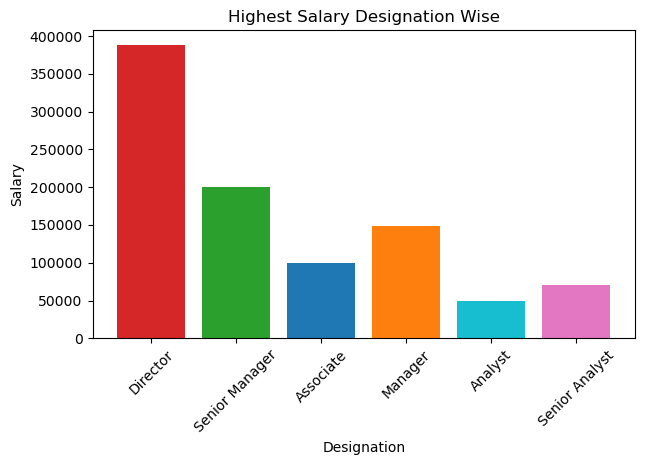

In [76]:
import matplotlib.pyplot as plt

x = df['designation']
y = df['salary']
lab = ['red', 'green', 'blue', 'orange', 'cyan', 'pink'] 
col = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'tab:cyan', 'tab:pink'] 

plt.figure(figsize=(7, 4))
plt.bar(x, y, color=col) 
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.title('Highest Salary Designation Wise')
plt.show()

<b style="background-color:black; color:yellow;">Then we execute a second query using the Python MySQL library. This query specifically targets the highest salary across all desigantions, aiming to retrieve only one record that represents the highest salary across all designations.And also these query are called subquery.</B>

In [77]:
import mysql.connector

try:
    cur=mysql.connector.connect(
    host='localhost',
    user='root',
    password='viralshah21',
    database='dataanalysis'
    )
    
    cursor=cur.cursor()
    sql='''select firstname,sex,doj,designation,salary from employeesprofession where salary =(select max(salary)
    from employeesprofession)'''
    cursor.execute(sql)
    for data in cursor:
        print(data)
    
    cursor.close()
    cur.close()
except Error as e:
    print(e)

('DEREK', 'M', datetime.date(2013, 2, 13), 'Director', 388112)


<b style="background-color:black; color:yellow;">Then we execute a third query using the Python MySQL library. This query specifically targets employees whose salary ranges between 45000 to 130000 and top 10 whose designation is "senior analyst."</b>

In [78]:
import mysql.connector

try:
    cur=mysql.connector.connect(
    host='localhost',
    user='root',
    password='viralshah21',
    database='dataanalysis'
    )
    
    cursor=cur.cursor()
    sql='''select firstname,sex,doj,designation,salary from employeesprofession
           where salary > 45000 and salary <130000 and designation="Senior Analyst" 
           order by salary desc limit 10
           '''
    cursor.execute(sql)
    for data in cursor:
        print(data)
    
    cursor.close()
    cur.close()
except Error as e:
    print(e)

('LEWIS', 'M', datetime.date(2013, 12, 29), 'Senior Analyst', 69966)
('MAURICIO', 'M', datetime.date(2014, 7, 13), 'Senior Analyst', 69877)
('NAOMI', 'F', datetime.date(2014, 7, 20), 'Senior Analyst', 69851)
('CECILE', 'F', datetime.date(2013, 5, 25), 'Senior Analyst', 69841)
('MARGOT', 'F', datetime.date(2012, 9, 28), 'Senior Analyst', 69772)
('ANGELINA', 'F', datetime.date(2014, 12, 13), 'Senior Analyst', 69716)
('RENAE', 'F', datetime.date(2013, 3, 27), 'Senior Analyst', 69643)
('RENAE', 'F', datetime.date(2013, 3, 27), 'Senior Analyst', 69643)
('SHERYL', 'F', datetime.date(2013, 6, 8), 'Senior Analyst', 69590)
('CRUZ', 'M', datetime.date(2013, 9, 13), 'Senior Analyst', 69432)


<b style="background-color:black; color:yellow;">Also, we can use statistical functions like mean and median to compute additional information about employees' salaries and other relevant data. The mean represents the average salary across the dataset, providing a measure of central tendency, while the median represents the middle value of the salary distribution, offering insights into the typical salary level. These statistical measures help in understanding the salary distribution and making informed decisions based on the data analysis.</b>

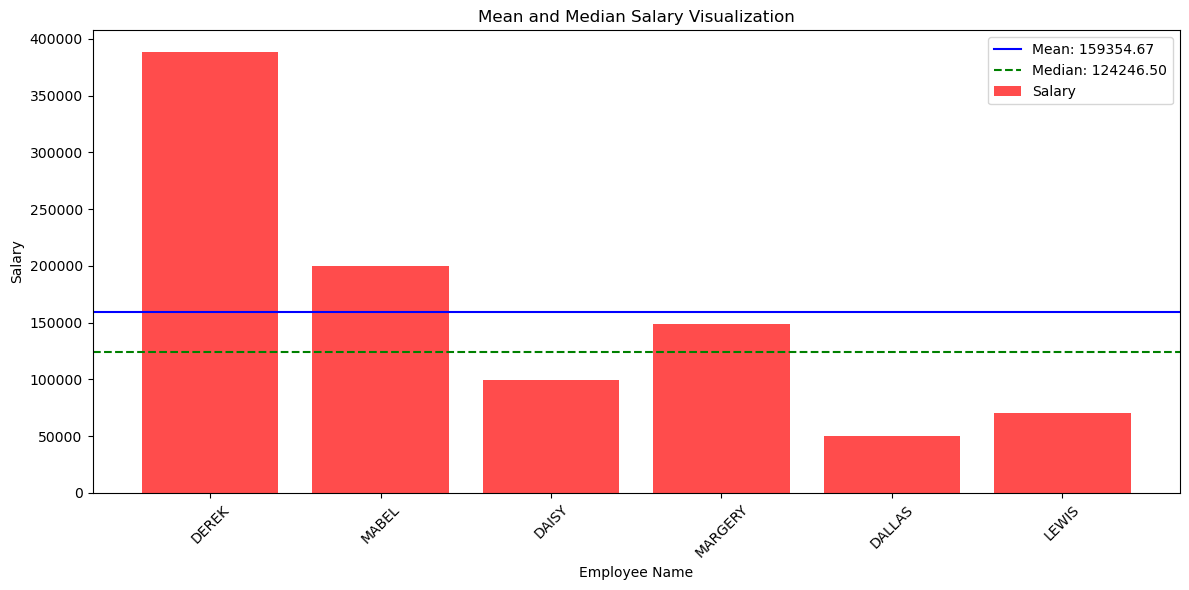

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Department Highest Salary.csv')

# Calculate mean and median
mean_value = df['salary'].mean()
median_value = df['salary'].median()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df['firstname'], df['salary'], color='red', alpha=0.7, label='Salary')
plt.axhline(y=mean_value, color='b', linestyle='-', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
plt.xlabel('Employee Name')
plt.ylabel('Salary')
plt.title('Mean and Median Salary Visualization')
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout()
plt.show()
